# BBL536E DATA SCIENCE 
## HOMEWORK #2
---
Vefak Murat Akman


## Problem 1:

`def problem1`

---
### Mutual Information Score Method
---
The Mutual Information is a measure of the similarity between two labels of the same data. Get Top-4 features

### Recursive Feature Elimination Method
---
Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. 

I used RFE with Ridge Regressor. Rigde Regressor parameters were default. Get Top-4 features


### Import Libraries
---

In [11]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Preparing & Exploring Data
---
This data about effect of features on calory burning

    - Calories Burned	
    - Steps	
    - Distance	
    - Floors	
    - Minutes Sedentary	
    - Minutes Lightly Active	
    - Minutes Fairly Active	
    - Minutes Very Active	
    - Activity Calories



In [20]:
data = pd.read_csv("fitbit.csv") #Reading data
print("Length of data = ",len(data))
print("Shape of data  = ",data.shape)
data.head()

Length of data =  30
Shape of data  =  (30, 10)


,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
0,7/07/2016,"2,682","12,541",9.02,13,667,171,18,60,"1,248"
1,8/07/2016,"2,423","8,029",5.70,35,760,208,13,6,928
2,9/07/2016,"2,875","10,801",7.67,3,496,148,18,46,"1,040"
3,10/07/2016,"2,638","11,997",8.52,22,771,248,3,27,"1,285"
4,11/07/2016,"2,423","9,039",6.42,12,714,232,10,16,"1,044"


In [21]:
#Drop "Date" Column
data = data.drop(['Date'], axis=1) 
print("Shape of data after drop column = ",data.shape)

#There is error in csv file that some of columns are considered as strings
#I converted them to floats
data["Steps"] =data["Steps"].apply(lambda x : x.replace(',' , '')).astype(float)
data["Calories Burned"] =data["Calories Burned"].apply(lambda x : x.replace(',' , '')).astype(float)
data["Activity Calories"] =data["Activity Calories"].apply(lambda x : x.replace(',' , '')).astype(float)


Shape of data after drop column =  (30, 9)


In [22]:
#Check Data to control Date column was dropped or not
data.head()

,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
0,2682.0,12541.0,9.02,13,667,171,18,60,1248.0
1,2423.0,8029.0,5.70,35,760,208,13,6,928.0
2,2875.0,10801.0,7.67,3,496,148,18,46,1040.0
3,2638.0,11997.0,8.52,22,771,248,3,27,1285.0
4,2423.0,9039.0,6.42,12,714,232,10,16,1044.0


In [23]:
# Split Data as X(features) and y(targets)
y = data.iloc[:, 0].values
X = data.iloc[:, 1:9].values
print("Shape of X = ",X.shape)
print("Shape of y = ",y.shape)

Shape of X =  (30, 8)
Shape of y =  (30,)


### Problem 1 Function

In [24]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge

def problem1(X,y):
    """
    Input:
        
        X : Features
        y : Targets
        
    Returns:
    
        top_mutual : Top-4 features by mutual info
        top_rfe    : Top-4 features by RFE
        
    """
    
    mic = mutual_info_regression(X, y) #Find mutual information between classes
    top_mutual = mic.argsort()[-4:][::-1] #Sort and get Top-4 
    
    model = Ridge() #Create Ridge Regressor 
    rfe = RFE(model,4,step=0.1,verbose=0) #Create RFE object
    rfe_selection = rfe.fit(X,y) #Training
    top_rfe = rfe_selection.support_ #Top-4 Elements
    
    return top_mutual, top_rfe

In [25]:
#Print Results
mutual,rfe = problem1(X,y)
list_mutual = []
list_rfe = []

# Add answer to list object to print results properly
for i, col  in enumerate(mutual): 
    list_mutual.append(data.columns[col+1])

list_rfe.append(data.columns[1:9][rfe])

print("Top-4 Features")   
print("--------------------")   
print("Mutual Top-4 Features: {}\n".format(list_mutual))
print("RFE Top-4 Features: {}".format(list_rfe[0]))


Top-4 Features
--------------------
Mutual Top-4 Features: ['Activity Calories', 'Minutes Fairly Active', 'Steps', 'Distance']

RFE Top-4 Features: Index(['Distance', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active'],
      dtype='object')


## Problem 2:

`def problem2`

---
### K-means
---
The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares

- Produce Elbow and Silhoutte Coefficient Plots for cluster ranging from 2 to 9.

- Apply Standard Scaling

- Drop ID Column



### Preparing & Exploring Data

In [8]:
data = pd.read_csv("customer.csv", sep=",") #Reading data
print("Length of data= ",len(data))
print("Shape of data= ",data.shape)
data.head(10)

Length of data=  60
Shape of data=  (60, 5)


,ID,Visit.Time,Average.Expense,Sex,Age
0,1,3,5.7,0,10
1,2,5,14.5,0,27
2,3,16,33.5,0,32
3,4,5,15.9,0,30
4,5,16,24.9,0,23
5,6,3,12.0,0,15
6,7,12,28.5,0,33
7,8,14,18.8,0,27
8,9,6,23.8,0,16
9,10,3,5.3,0,11


In [9]:
#Drop "Date" Column
data = data.drop(['ID'], axis=1) 
print("Shape of data after drop ID column= ",   data.shape)

Shape of data after drop ID column=  (60, 4)


In [10]:
# Get features
features=data.iloc[:,:4]
features.head()

# Scale features by using StandardScaler Method
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features = sc.fit_transform(features)

### Problem 2 Function

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def problem2(features):
    """
    Input:
        
        X : Features
        
        
    Returns:
    
        inertia_list : Sum of squared distances of samples to their closest cluster center.
        silhouette_score_list  : Silhouette Coefficient of all samples.
        
    """
    km=KMeans(n_clusters=4) # Create K-means object with 4 cluster

    # Create two list to keep results
    inertia_list=[] 
    silhouette_score_list=[]
    
    for i in range(2,10): #2-9 cluster
        k_means=KMeans(n_clusters=i,n_init=10) #K-means object
        k_means.fit(features) #Train
        inertia_list.append(k_means.inertia_) #Inertia Scores
        silhouette_score_list.append(silhouette_score(features,k_means.labels_)) # silhouette coefficients
        
    return inertia_list, silhouette_score_list

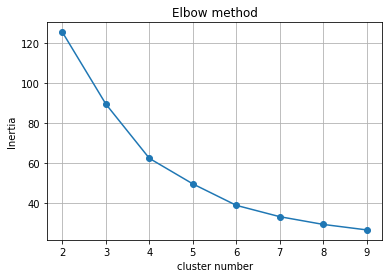

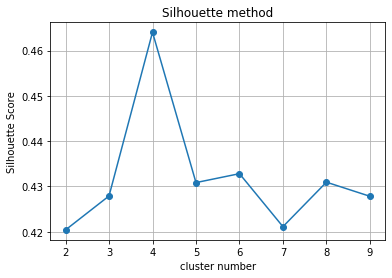

In [12]:
#Call problem2 function
inertia_list, silhouette_score_list=  problem2(features)

#Drawing Elbow and Silhouette graphs
cluster_numbers=np.arange(2,10)
plt.plot(cluster_numbers,inertia_list,"o-")
plt.xlabel("cluster number")
plt.ylabel("Inertia")
plt.title("Elbow method")
plt.grid(True)
plt.show()

plt.plot(cluster_numbers,silhouette_score_list,"o-")
plt.xlabel("cluster number")
plt.ylabel("Silhouette Score")
plt.title("Silhouette method")
plt.grid(True)
plt.show()

## Problem 3:

`def problem3`

---

Predict customer churn with 
    - Logistic Regression
    - Decision Tree
    - Support Vector Machine
    - K-Nearest Neighbor 
    - Neural Network methods

Using 5-Fold cv with shuffling. Drop ID column. Remove rows which have missing data

### Preparing & Exploring Data
---

In [13]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv", sep=",") #Reading data
print("Shape of data = ",data.shape)


#Drop "Date" Column
data = data.drop(['customerID'], axis=1) 
print("Shape of data after drop column = ",   data.shape, "\n\n")

#To remove rows which have empty values first convert empty cells to nan
data = data.replace(' ', np.nan)
print('Null Values: \n', data.isnull().any()) #Control which column has nan values
print("----------------------\n")

empty_cells = np.where(pd.isnull(data)) 
print("Number of rows with empty cells: {}".format(len(empty_cells[0])),"\n")
data = data.dropna() #Remove rows
print("Shape of data after remove rows= ",   data.shape)

Shape of data =  (7043, 21)
Shape of data after drop column =  (7043, 20) 


Null Values: 
 gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool
----------------------

Number of rows with empty cells: 11 

Shape of data after remove rows=  (7032, 20)


In [14]:
from sklearn.preprocessing import LabelEncoder

#Non-numeric features
categorilcals = ['gender', 'Partner', 'Dependents', 
                 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn']
#Encoding non-numeric features
labelencoder = LabelEncoder()
for word in (categorilcals):
    data[word]      = labelencoder.fit_transform(data[word]) 

#Divide data as features(X) and target(y)    
X = data.iloc[:, 0:19].values.astype(float)
y = data.iloc[:, -1].values.astype(float)


#Scaling Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier


def problem3(model_selected, features, target, cv):
    
    
    """
    Input:
        
        features : Features
        target   : Target.(Labels)
        cv : cross-validation generator 
        model_selected : To select which model will use the train features
            List of 5 Possible Models:
                
                'lr'  = Logistic Regression
                'mlp' = MLP Classifier (Neural Network Model)
                'dtc' = Decision Tree Classifier
                'svc' = Linear Support Vector Machine
                'knn' = k-Nearest Neighbors 
        
    Returns:
    
        results : Mean of results
        
    """
    
    if(model_selected == 'lr'):
         model= LogisticRegression()

    elif(model_selected == 'mlp'):
         model= MLPClassifier()

    elif(model_selected == 'dtc'): 
         model= DecisionTreeClassifier()

    elif(model_selected == 'svc'):
         model= LinearSVC()

    elif(model_selected == 'knn'):
         model= KNeighborsClassifier()

    else:
         raise NameError('invalid selected model')
         

    results= cross_val_score(model, features, target, cv=cv)   

    return results.mean()

In [16]:
#Split data as Traing and Test
from sklearn.model_selection import train_test_split, cross_val_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

# 5-Fold with shuffling
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=0)


#Call function and keep results
train_lr = problem3('lr', X_train, y_train, kfold)
test_lr = problem3('lr', X_test, y_test, kfold)

train_dtc = problem3('dtc', X_train, y_train, kfold)
test_dtc = problem3('dtc', X_test, y_test, kfold)

train_svc = problem3('svc', X_train, y_train, kfold)
test_svc = problem3('svc', X_test, y_test, kfold)

train_knn = problem3('knn', X_train, y_train, kfold)
test_knn = problem3('knn', X_test, y_test, kfold)

train_mlp = problem3('mlp', X_train, y_train, kfold)
test_mlp = problem3('mlp', X_test, y_test, kfold)

    

/home/vefak/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/vefak/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/vefak/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/vefak/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/vefak/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571:

In [17]:
print("model                train   test")
print("-------------------------------------")
print("LogisticRegression   {:.3f}   {:.3f}   ".format(train_lr,  test_lr))
print("DecisionTree         {:.3f}   {:.3f}   ".format(train_dtc, test_dtc))
print("LinearSVC            {:.3f}   {:.3f}   ".format(train_svc,  test_svc))
print("KNN                  {:.3f}   {:.3f}   ".format(train_knn,  test_knn))
print("MLPClassifier        {:.3f}   {:.3f}   ".format(train_mlp,  test_mlp))




model                train   test
-------------------------------------
LogisticRegression   0.801   0.806   
DecisionTree         0.720   0.718   
LinearSVC            0.803   0.805   
KNN                  0.748   0.751   
MLPClassifier        0.783   0.786   
